In [1]:
!pip install watson-machine-learning-client

In [2]:
from ibm_watson_machine_learning import APIClient
wml_credentials={ 
                    "url":"https://us-south.ml.cloud.ibm.com",
                    "apikey":"QXdS9eYZqw3SK9Cvz9QV34qVW2O-V7DEBJ9Hpe1B39gO"
                }
client=APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [3]:
client=APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [4]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [5]:
space_uid=guid_from_space_name(client,'fruit_tarining')
print("Space UID = "+space_uid)

Space UID = eaf8b765-a737-4fa1-84a1-f3ac6103e7d9


In [6]:
client.set.default_space(space_uid)

'SUCCESS'

In [7]:
client.repository.download('0b361923-1c54-4719-821f-5702e0dd668d',"my_model.tar.gz")

Successfully saved model content to file: 'my_model.tar.gz'


'C:\\Users\\Admin/my_model.tar.gz'

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

In [10]:
model=load_model('vegetable1.h5')

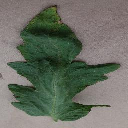

In [11]:
img=image.load_img('tomato.jpg',target_size=(128,128))
img

In [12]:
import numpy as np
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [13]:
x.shape

(1, 128, 128, 3)

In [14]:
pred=model.predict(x)

In [15]:
pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
disease=["Pepper bell bacterial spot","Pepper bell healthy","Potato early blight","Potato healthy","Potato late blight","Tomato Bacterial Spot","Tomato late blight","Tomato leaf model","Tomato septoria leaf spot"]
#print(disease[pred[0]])
disease[np.where(pred[0]==1)[0][0]]

'Tomato septoria leaf spot'